In [1]:
import numpy as np 
import pandas as pd

from K_means import Kmeans
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist

import string

from nltk.corpus import stopwords

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import neattext.functions as nfx

from textblob import TextBlob as tb
from textblob import Word

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

In [2]:
may=pd.read_csv('03_PREPROCESSED_MAY.csv')

In [3]:
custom_words = ['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather',
                'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', '%', '.', 'the', 'etc', 'pls', 'btw', 'let', 'hgd', 'get', 'amp', 'gt','lt','hrs','dos','say','reply','sir','replying']

In [4]:
for i in range(0,may.shape[0]):
    may['clean_tweet'][i]= ''.join([i for i in may['clean_tweet'][i] if not i.isdigit()])
    may['clean_tweet'][i]=may['clean_tweet'][i].lower()
    may['clean_tweet'][i]=nfx.remove_custom_words(may['clean_tweet'][i],custom_words)

In [5]:
tweets_may=may['clean_tweet']

In [6]:
tweet_list_may= tweets_may.apply(nfx.remove_stopwords)
tweet_list_may= tweet_list_may .apply(nfx.remove_special_characters)
tweet_list_may= tweet_list_may.apply(nfx.remove_punctuations)

In [7]:
def remove_single_char(list):
    for token in list:
        if( len(token)==1):
            list.remove(token)
def remove_dual_char(list):
    for token in list:
        if( len(token)==2):
            list.remove(token)
def remove_words(list1, remove_words):
    for word in list(list1):
        if word in remove_words:
            list1.remove(word)
    return list1   

In [8]:
def Convert_list(string):
    li = list(string.split(" "))
    return li
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

In [9]:
for i in range(0,may.shape[0]):
    ls=Convert_list(tweet_list_may[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_may[i]=listToString(ls)

In [10]:
def my_lemma(token,i=0):
    word=tb(token)
    tags=word.tags
    sample=Word(tags[0][0])
    if tags[0][1][0] =='V':
        x=sample.lemmatize('v')
        ls[i]=x
    else:
        x=sample.lemmatize()
        ls[i]=x

In [11]:
for i in range(0,may.shape[0]):
    ls=Convert_list(tweet_list_may[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
                continue
        word=tb(text)
        tags=word.tags
        sample=Word(tags[0][0])
        if tags[0][1][0] =='V':
                x=sample.lemmatize('v')
                ls[j]=x
        else:
                x=sample.lemmatize()
                ls[j]=x

In [12]:
for i in range(0,may.shape[0]):
    ls=Convert_list(tweet_list_may[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
            continue
        my_lemma(text,j)
    tweet_list_may[i]=listToString(ls)

In [13]:
for i in range(0,may.shape[0]):
    ls=Convert_list(tweet_list_may[i])
    ls=remove_words(ls,custom_words)
    tweet_list_may[i]=listToString(ls)

In [14]:
may['clean_tweet']=tweet_list_may

In [15]:
may['clean_tweet'][1835]

''

In [16]:
tweet_list_may=may['clean_tweet']
ps=PorterStemmer()
for i in range(0,may.shape[0]):
    ls=may['clean_tweet'][i]
    words = word_tokenize(ls)
    st=""
    for w in words:
        w=ps.stem(w)
        st+=w+' '
    may['clean_tweet'][i]=st
for i in range(0,may.shape[0]):
    ls=Convert_list(tweet_list_may[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_may[i]=listToString(ls)
may['clean_tweet']=tweet_list_may

# K-Means

In [17]:
data =may['clean_tweet']

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [18]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())

,aaaameeen,aadmi,aaj,aam,aamir,aan,aap,aapan,aapka,aaps,...,zampathri,zenica,zero,zilla,zillapanchayat,zmc,zombi,zone,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

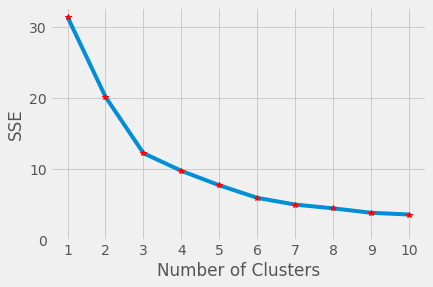

In [20]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans_kwargs = {"init": "k-means++","n_init": 2,"max_iter": 1000,"random_state": 42,}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Y_sklearn)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.plot(range(1, 11), sse,'r*')
plt.xticks(range(1, 11))
plt.yticks(range(0,40,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5579674094073745
For n_clusters = 3 The average silhouette_score is : 0.5454836790759061
For n_clusters = 4 The average silhouette_score is : 0.4455334459062161
For n_clusters = 5 The average silhouette_score is : 0.4632551439778846
For n_clusters = 6 The average silhouette_score is : 0.48620440153851485
For n_clusters = 7 The average silhouette_score is : 0.49005333149912533
For n_clusters = 8 The average silhouette_score is : 0.3868077347716144
For n_clusters = 9 The average silhouette_score is : 0.5009645638426666
For n_clusters = 10 The average silhouette_score is : 0.3784935290411388


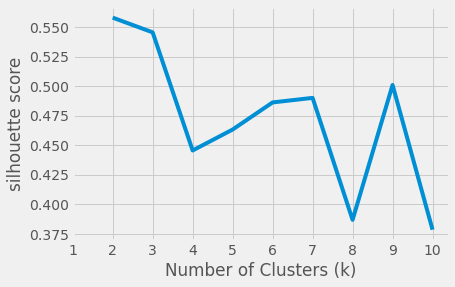

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.style as style
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
    cluster_labels = clusterer.fit_predict(Y_sklearn)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y_sklearn, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y_sklearn, cluster_labels)
style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.xticks(range(1, 11))
plt.show()

Text(0.5, 1.0, 'May')

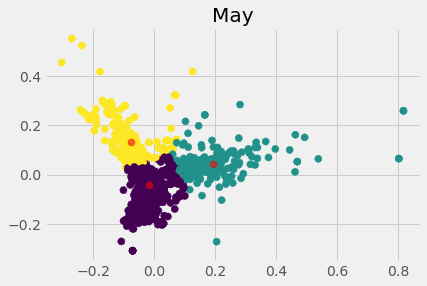

In [22]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=1000,n_init=2, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

centers = fitted.cluster_centers_
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=50, alpha=0.6);
plt.title("May",fontsize=20)
# plt.xlabel("Feature space for the 1st feature")
# plt.ylabel("Feature space for the 2nd feature")

In [23]:
labels = np.unique(prediction)
dfs1 = []
for label in labels:
    id_temp = np.where(prediction==label) 
    x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
    sorted_means = np.argsort(x_means)[::-1]
    features = tf_idf_vectorizor.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means]
    df = pd.DataFrame(best_features, columns = ['features', 'score'])
    dfs1.append(df)

In [24]:
dfs1[0]

,features,score
0,covid,0.053673
1,india,0.022126
2,help,0.018637
3,hospit,0.018445
4,remdesivir,0.017230
...,...,...
5220,indefinit,0.000000
5221,independ,0.000000
5222,cabinet,0.000000
5223,sphere,0.000000


In [25]:
dfs1[1]

,features,score
0,vaccin,0.218803
1,covid,0.061702
2,dose,0.030097
3,peopl,0.020405
4,india,0.019597
...,...,...
5220,oral,0.000000
5221,ordeal,0.000000
5222,orderdmampsp,0.000000
5223,ordinari,0.000000


In [26]:
dfs1[2]

,features,score
0,corona,0.142437
1,viru,0.058799
2,curfew,0.053278
3,till,0.023660
4,peopl,0.022373
...,...,...
5220,montagni,0.000000
5221,monitor,0.000000
5222,utilis,0.000000
5223,uttam,0.000000


In [27]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array,prediction, 10)

In [28]:
may_cluster=dfs

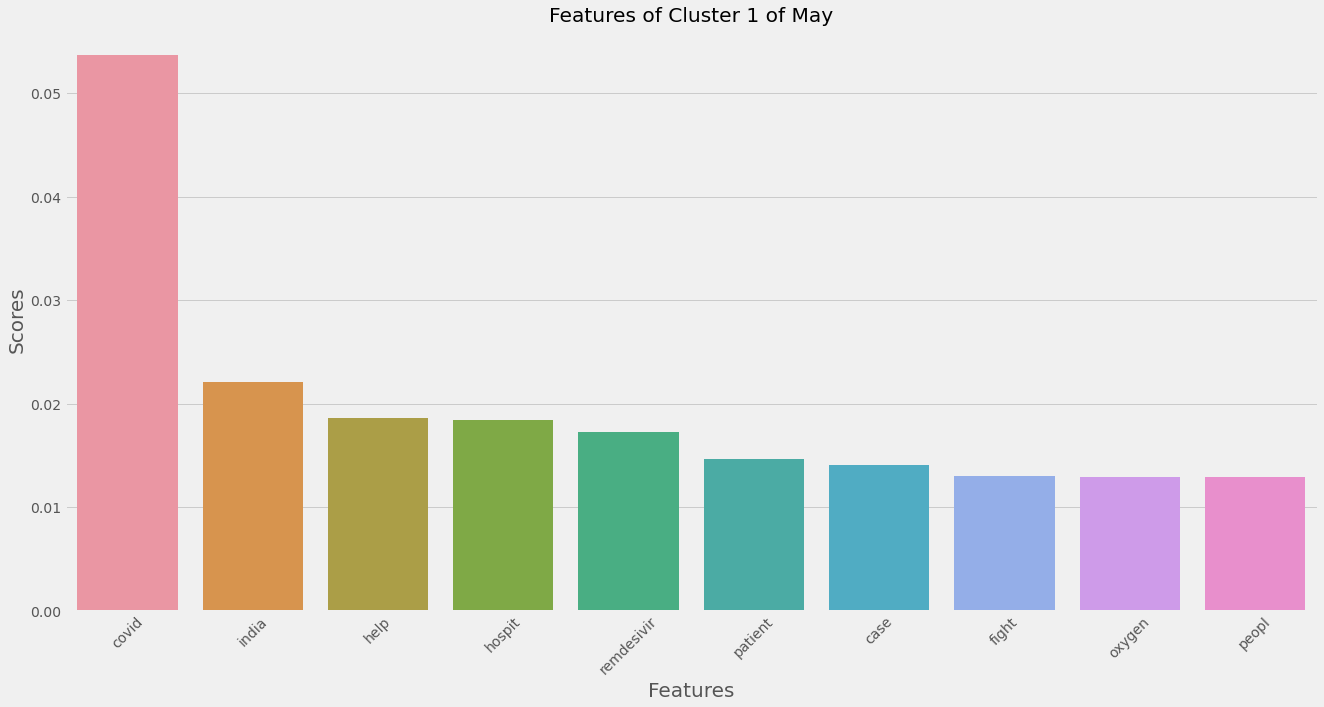

In [48]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=may_cluster[0]).set(title="Features of Cluster 1 of May")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

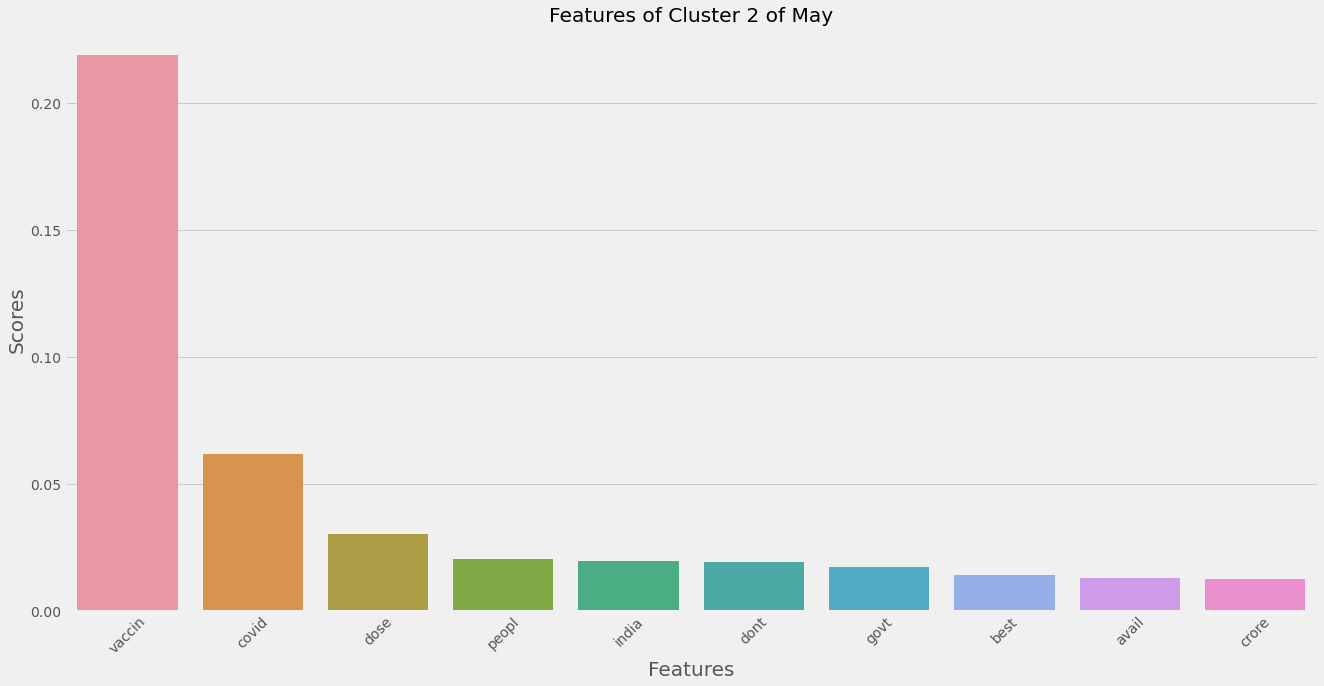

In [47]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=may_cluster[1]).set(title="Features of Cluster 2 of May")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

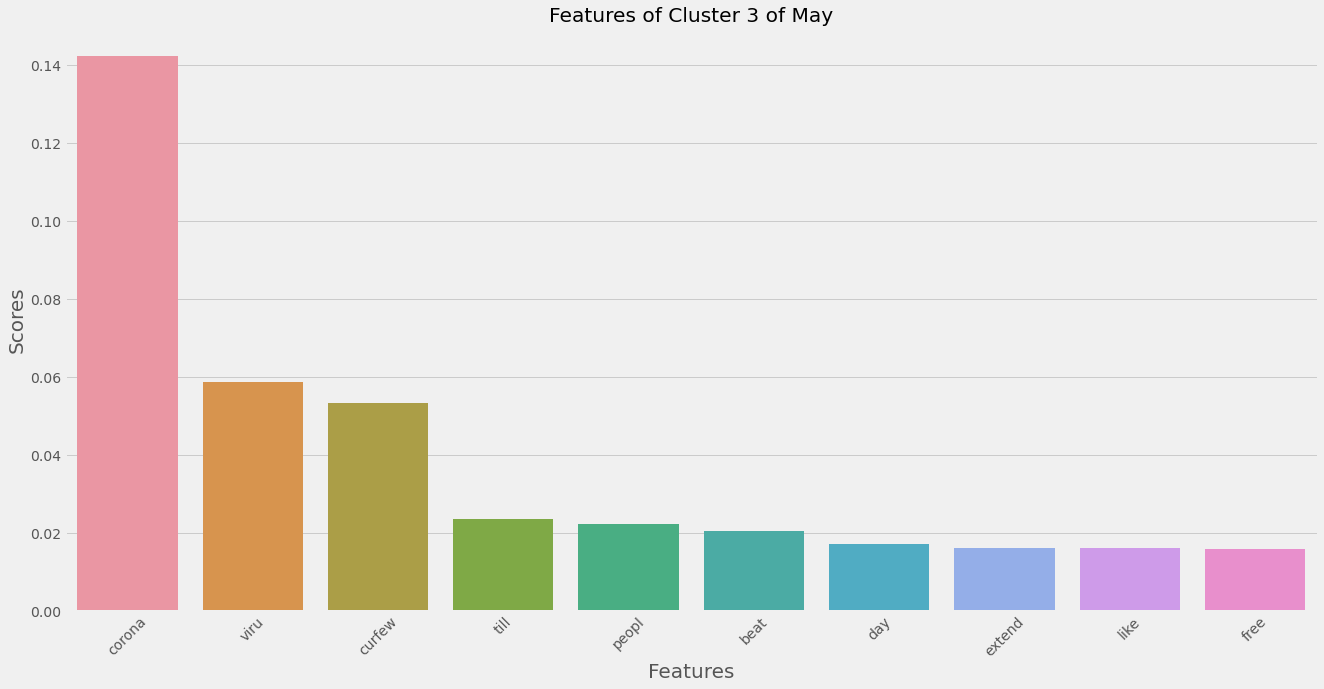

In [44]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=may_cluster[2]).set(title="Features of Cluster 3 of May")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

In [32]:

K3=dfs1[2]
K1=dfs1[0]
K2=dfs1[1]

In [33]:
may_bw=pd.read_csv('MayTopWords.csv')

In [34]:
t=may_bw[:30]
t

,Unnamed: 0,words,scores
0,0,covid,917
1,1,vaccin,428
2,2,corona,382
3,3,india,228
4,4,peopl,179
5,5,help,157
6,6,hospit,154
7,7,sir,142
8,8,patient,131
9,9,day,124


In [35]:
c1=[]
p=0
c2=[]
q=0
c3=[]
x=0
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K1['features'][j]):
            c1.append(K1['features'][j])
            p=p+1
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K2['features'][j]):
            c2.append(K1['features'][j])
            q=q+1
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K3['features'][j]):
            c3.append(K3['features'][j])
            x=x+1

In [36]:
print(p)
print(q)
print(x)

28
17
19


### Tweet Grouping

In [37]:
label=kmeans.labels_
may['label']=label
may.head(3)

,tweet,clean_tweet,hastags,attherate,urls,emojis,label
0,"The corona virus has a possible 39,000 RNA mut...",corona viru possibl rna mutat world far practi...,"['#COVIDisAirborne', '#Covid_19']",[],[],[],2
1,Second wave of coronavirus infection in India ...,second wave coronaviru infect india new varian...,[],[],['https://t.co/xuMMbohior'],[],0
2,BBC News - India coronavirus: New record death...,bbc news india coronaviru new record death vir...,['#coronavirus'],[],['https://t.co/jYpHJ58kJC'],[],0


In [38]:
np.unique(may['label'])

array([0, 1, 2])

In [39]:
may['label'].value_counts()

0    1275
2     318
1     243
Name: label, dtype: int64

In [40]:
may_cluster_1=may[may.label ==0]
may_cluster_2=may[may.label ==1]
may_cluster_3=may[may.label ==2]

In [41]:
may_cluster_1.to_csv('MayCluster1Tweet.csv')
may_cluster_2.to_csv('MayCluster2Tweet.csv')
may_cluster_3.to_csv('MayCluster3Tweet.csv')

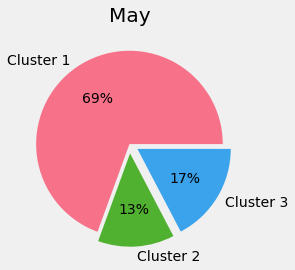

In [42]:
count=may['label'].value_counts()
tweet_freq_cluster=[]
tweet_freq_cluster.append(count[0])
tweet_freq_cluster.append(count[1])
tweet_freq_cluster.append(count[2])
cluster_name=['Cluster 1','Cluster 2','Cluster 3']
explode = [0, 0.1,0.1]
palette_color = sns.color_palette("husl", 3)
  
# plotting data on chart
plt.pie(tweet_freq_cluster, labels=cluster_name, colors=palette_color,   explode=explode,autopct='%.0f%%')
plt.title("May",fontsize=20)
# displaying chart
plt.show()

In [43]:
may['tweet'][302]

'both parents have now gotten their first doses of the covid vaccine &amp; I can finally breathe.. 🙏🏻🧿❤️'